In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

from dolfin import *
import dolfin

import sys
sys.path.insert(0, '../../')
import reaktoro_transport.solver as solver
import reaktoro_transport.tools as tools

import pymesh

In [2]:
# Reading mesh and MeshFunction that stores the fluid solid markers
mesh_xdmf = Mesh()

xdmf_obj = XDMFFile(MPI.comm_world, '../2_flow_simulation/fluid_mesh.xdmf')
xdmf_obj.read(mesh_xdmf)
xdmf_obj.close()

boundary_markers = MeshFunction('size_t', mesh_xdmf, dim=1)

xdmf_obj = XDMFFile(MPI.comm_world, '../2_flow_simulation/fluid_boundary.xdmf')
xdmf_obj.read(boundary_markers)

xdmf_obj.close()

print(mesh_xdmf.num_vertices())

3472


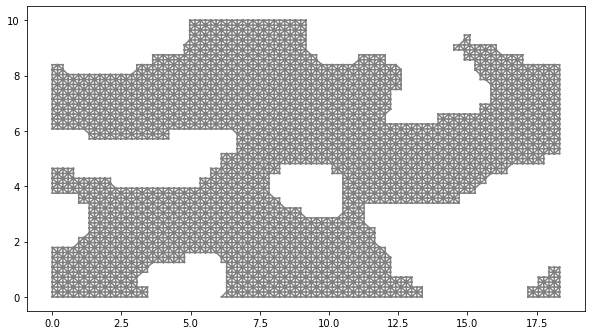

In [3]:
plt.figure(figsize=(10,6))
plot(mesh_xdmf)
plt.show()

In [4]:
#for i in range(1):
#mesh_xdmf = refine(mesh_xdmf)
points = np.insert(mesh_xdmf.coordinates(), 2, values=np.zeros(len(mesh_xdmf.coordinates())), axis=1)

In [5]:
mesh_mod = pymesh.form_mesh(points, mesh_xdmf.cells())
mesh_mod.add_attribute('vertex_dihedral_angle')
#mesh_mod.set_attribute('vertex_dihedral_angle', np.ones_like(mesh_xdmf.coordinates()[:,0]))

In [6]:
#pymesh.save_mesh("pymesh.obj", mesh_mod);

In [7]:
for i in range(1):
    mesh_mod, info = pymesh.collapse_short_edges(mesh_mod, rel_threshold=1.1, preserve_feature=True)
    mesh_mod, info = pymesh.remove_obtuse_triangles(mesh_mod, 160.0, 100)

mesh_mod = pymesh.resolve_self_intersection(mesh_mod)
mesh_mod, __ = pymesh.remove_duplicated_faces(mesh_mod)
#mesh_mod = pymesh.compute_outer_hull(mesh_mod)
# mesh_mod, __ = pymesh.remove_duplicated_faces(mesh_mod)
# mesh_mod, __ = pymesh.remove_obtuse_triangles(mesh_mod, 179.0, 5)
# mesh_mod, __ = pymesh.remove_isolated_vertices(mesh_mod)

In [8]:
editor = MeshEditor()
mesh_edited = Mesh()
editor.open(mesh_edited, 'triangle', 2, 2)

points = mesh_mod.vertices
cells = mesh_mod.faces

editor.init_vertices(len(points))
editor.init_cells(len(cells))

for k, point in enumerate(points):
    editor.add_vertex(k, point[:2])
for k, cell in enumerate(cells):
    editor.add_cell(k, cell)
editor.close()

print(mesh_edited.num_vertices())

1185


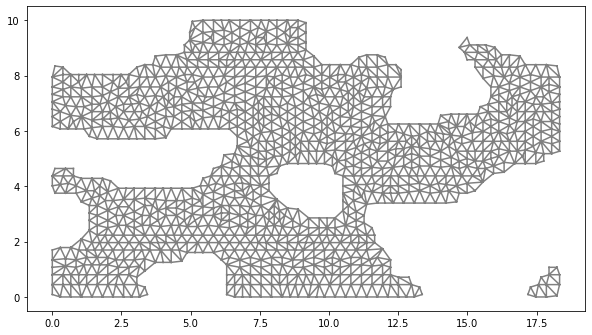

In [9]:
plt.figure(figsize=(10,6))
#plot(mesh_xdmf)
plot(mesh_edited)
plt.show()